In [1]:
pip install mp-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.1/122.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━

In [2]:
from mp_api.client import MPRester

In [3]:
with MPRester("orZiiUOu9TZLk9hRpVBMmBBSY7YPRDzA") as mpr:
    docs = mpr.materials.summary.search(
        material_ids=["mp-149", "mp-13", "mp-22526"]
    )

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
print(docs)

[MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', run_id=None, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 46, 57, 168000), license='BY-C'),
nsites=2,
elements=[Element Si],
nelements=1,
composition=Composition('Si2'),
composition_reduced=Composition('Si1'),
formula_pretty='Si',
formula_anonymous='A',
chemsys='Si',
volume=40.32952684741405,
density=2.312800253345134,
density_atomic=20.164763423707026,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='2.0.2'),
property_name='summary',
material_id=MPID(mp-149),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 11, 22, 19, 46, 57, 169000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1947498), last_updated=datetime.datetime(2021, 3, 5, 11, 47, 3, 84000)), PropertyOrigin(name='energy', task_id=MPID(mp-1947498), last_updated=

In [5]:
!wget 'https://figshare.com/ndownloader/articles/13147324/versions/14'

--2024-10-03 16:41:31--  https://figshare.com/ndownloader/articles/13147324/versions/14
Resolving figshare.com (figshare.com)... 34.246.217.147, 52.16.180.141, 2a05:d018:1f4:d003:9519:73c2:cbe:93c0, ...
Connecting to figshare.com (figshare.com)|34.246.217.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407219972 (388M) [application/zip]
Saving to: ‘14’

14                  100%[===================>] 388.35M  31.5MB/s    in 13s     

2024-10-03 16:41:44 (29.6 MB/s) - ‘14’ saved [407219972/407219972]



In [6]:
!unzip 14

Archive:  14
 extracting: logo.jpg                
 extracting: qmof_database.zip       


In [7]:
!unzip qmof_database.zip -d /qmof_db

Archive:  qmof_database.zip
  inflating: /qmof_db/qmof_database/qmof.csv  
  inflating: /qmof_db/qmof_database/qmof.json  
  inflating: /qmof_db/qmof_database/qmof_structure_data.json  
  inflating: /qmof_db/qmof_database/README.md  
 extracting: /qmof_db/qmof_database/relaxed_structures.zip  
   creating: /qmof_db/qmof_database/scripts/
  inflating: /qmof_db/qmof_database/scripts/json_to_csv.py  
  inflating: /qmof_db/qmof_database/scripts/make_cifs.py  
 extracting: /qmof_db/qmof_database/unrelaxed_structures.zip  


In [8]:
import os
os.chdir('/qmof_db/qmof_database')

In [9]:
import pandas as pd

df = pd.read_csv('qmof.csv')
print(df.head())

        qmof_id          name       info.formula info.formula_reduced  \
0  qmof-8a95c27  ABACUF01_FSR      Ba2CuC6H14O16        Ba2CuC6H14O16   
1  qmof-019ba28    ABALOF_FSR  Cu12C36H56I16N4S4         Cu3C9H14I4NS   
2  qmof-830ed1c    ABAVIJ_FSR     Co4C48H32N8O16          CoC12H8N2O4   
3  qmof-5bd4a24    ABAVOP_FSR     Co4C48H32N8O16          CoC12H8N2O4   
4  qmof-644aab4    ABAXUZ_FSR    Zn2C50H32N6O8S4       ZnC25H16N3O4S2   

                           info.mofid.mofid                info.mofid.mofkey  \
0                                       NaN                              NaN   
1                                       NaN                              NaN   
2  [Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0  Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl   
3  [Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0  Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl   
4                                       NaN                              NaN   

  info.mofid.smiles_nodes                          info.mofid.smiles_linkers  \


<ipython-input-9-49a1b08d708d>:3: DtypeWarning: Columns (40,41,43,44,45,46,47,49,50,51,52,53,55,56,57,65,66,67,68,69,77,78,79,80,81,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('qmof.csv')


In [10]:
header_lst = list(df.columns.values)
for hed in header_lst:
  print(hed)

qmof_id
name
info.formula
info.formula_reduced
info.mofid.mofid
info.mofid.mofkey
info.mofid.smiles_nodes
info.mofid.smiles_linkers
info.mofid.smiles
info.mofid.topology
info.natoms
info.pld
info.lcd
info.density
info.volume
info.symmetry.spacegroup
info.symmetry.spacegroup_number
info.symmetry.spacegroup_crystal
info.symmetry.pointgroup
info.synthesized
info.source
info.doi
inputs.pbe.theory
inputs.pbe.pseudopotentials
inputs.pbe.encut
inputs.pbe.kpoints
inputs.pbe.gamma
inputs.pbe.spin
outputs.pbe.energy_total
outputs.pbe.energy_vdw
outputs.pbe.energy_elec
outputs.pbe.net_magmom
outputs.pbe.bandgap
outputs.pbe.cbm
outputs.pbe.vbm
outputs.pbe.directgap
outputs.pbe.bandgap_spins
outputs.pbe.cbm_spins
outputs.pbe.vbm_spins
outputs.pbe.directgap_spins
inputs.hle17.theory
inputs.hle17.pseudopotentials
inputs.hle17.encut
inputs.hle17.kpoints
inputs.hle17.gamma
inputs.hle17.spin
inputs.hse06_10hf.theory
inputs.hse06_10hf.pseudopotentials
inputs.hse06_10hf.encut
inputs.hse06_10hf.kpoints
inp

In [11]:
df.shape

(20375, 94)

In [12]:

df_sorted_by_pld = df.dropna(subset=["info.pld"])
df_sorted_by_pld = df_sorted_by_pld.sort_values(by=['info.pld'], ascending=True)

In [13]:
df_sorted_by_pld.head()

,qmof_id,name,info.formula,info.formula_reduced,info.mofid.mofid,info.mofid.mofkey,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.mofid.topology,...,outputs.hse06.energy_elec,outputs.hse06.net_magmom,outputs.hse06.bandgap,outputs.hse06.cbm,outputs.hse06.vbm,outputs.hse06.directgap,outputs.hse06.bandgap_spins,outputs.hse06.cbm_spins,outputs.hse06.vbm_spins,outputs.hse06.directgap_spins
7844,qmof-82d5634,LEPKIB_FSR,K4C6H2N6O6,K2C3HN3O3,NaN,NaN,['[K]'],['O=C1NC(=O)N=[C](=O)[N]1'],O=C1NC(=O)N=[C](=O)[N]1.[K],"ERROR,UNKNOWN",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7328,qmof-d3a3906,KIYBEZ01_FSR,K9C18H12N9O33,K3C6H4N3O11,NaN,NaN,['[K][OH2][K][OH2][K]'],['O=N(=O)[C]1C(=O)[C](N(=O)=O)C(=O)[C](C1=O)N(...,O=N(=O)[C]1C(=O)[C](N(=O)=O)C(=O)[C](C1=O)N(=O...,NaN,...,-631.074067,0.0,3.173919,2.352000,-0.821919,True,"[None, None]","[None, None]","[None, None]","[None, None]"
10412,qmof-ac2a33a,ORONOA_FSR,K12C24H20O28,K3C6H5O7,NaN,NaN,['[K]'],['[O-]C(=O)C(CC(=O)[O-])(CC(=O)[O-])O'],[K].[O-]C(=O)C(CC(=O)[O-])(CC(=O)[O-])O,NaN,...,-631.596840,0.0,6.438480,4.695300,-1.743180,True,"[None, None]","[None, None]","[None, None]","[None, None]"
11833,qmof-53f9751,QQQFIP02_FSR,K4C12Cl4H4O10,K2C6Cl2H2O5,NaN,NaN,['[K][OH2][K]'],['Cl[C]1C(=O)C(=O)[C](C(=O)C1=O)Cl'],Cl[C]1C(=O)C(=O)[C](C(=O)C1=O)Cl.[K][OH2][K],bex,...,-256.590938,0.0,2.338748,2.556406,0.217658,False,"[None, None]","[None, None]","[None, None]","[None, None]"
7347,qmof-da50262,KMTSUL01_FSR,K12C4H12O40S12,K3CH3O10S3,NaN,NaN,"['[K]', '[K][OH2][K]']",['[O]S(C(S([O])([O])[O])S([O])([O])[O])([O])[O]'],[K].[K][OH2][K].[O]S(C(S([O])([O])[O])S([O])([...,NaN,...,-562.641778,0.0,7.358938,5.819059,-1.539879,True,"[None, None]","[None, None]","[None, None]","[None, None]"


In [14]:
df_sorted_by_pld['info.synthesized']

,info.synthesized
7844,True
7328,True
10412,True
11833,True
7347,True
...,...
20136,False
20130,False
20179,False
20151,False


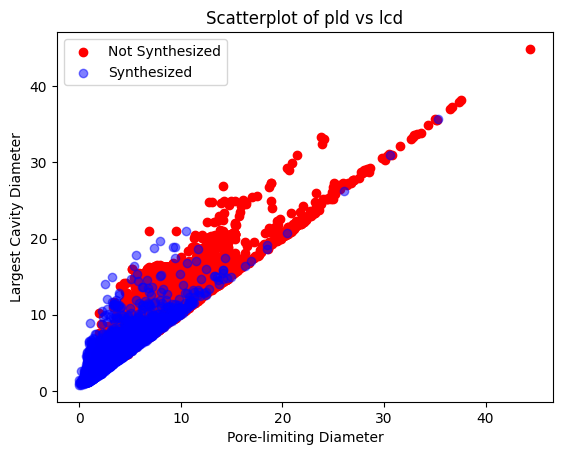

In [17]:
import matplotlib.pyplot as plt

synthesized = df_sorted_by_pld[df_sorted_by_pld['info.synthesized'] == True]
not_synthesized = df_sorted_by_pld[df_sorted_by_pld['info.synthesized'] == False]

plt.scatter(false_data['info.pld'], not_synthesized['info.lcd'], label='Not Synthesized', color='red')
plt.scatter(true_data['info.pld'], synthesized['info.lcd'], label='Synthesized', color='blue',alpha=0.5)


plt.xlabel('Pore-limiting Diameter')
plt.ylabel('Largest Cavity Diameter')
plt.title('Scatterplot of pld vs lcd')
plt.legend()
plt.show()


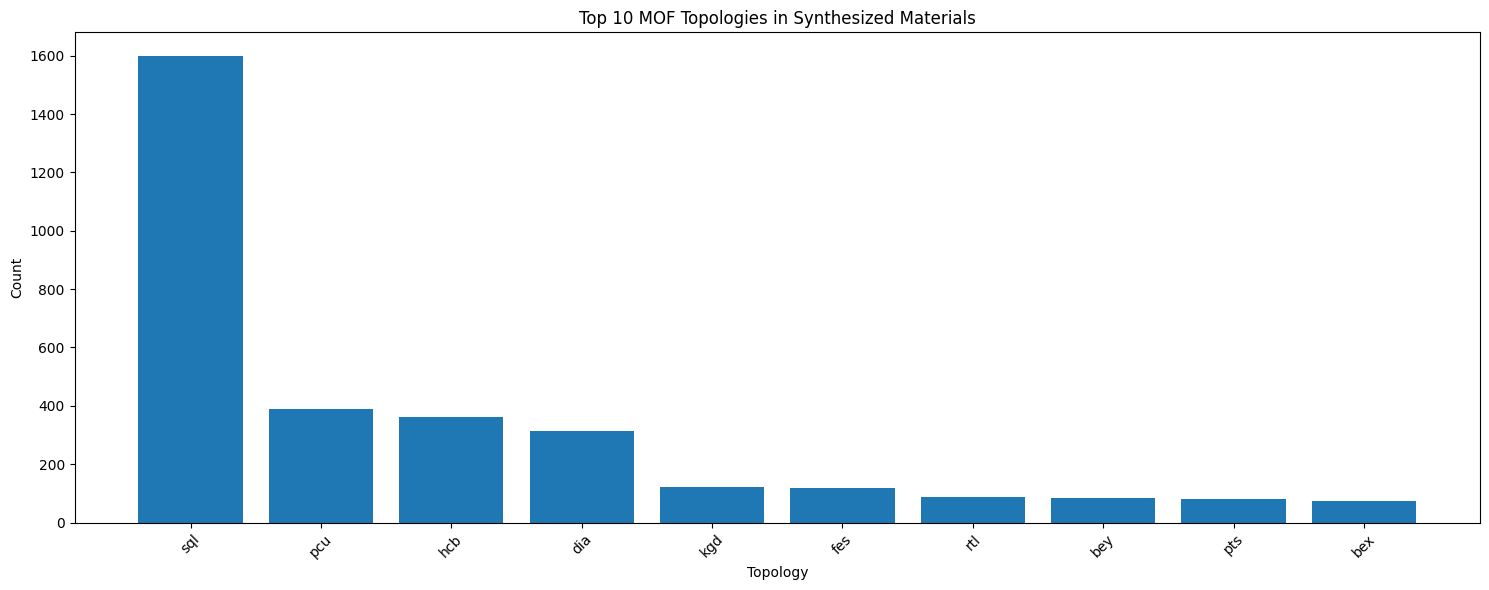

In [35]:
topology_counts = synthesized['info.mofid.topology'].value_counts()
top_10_topologies = topology_counts[:10]

plt.figure(figsize=(15, 6))
plt.bar(top_10_topologies.index, top_10_topologies.values)
plt.xlabel('Topology')
plt.ylabel('Count')
plt.title('Top 10 MOF Topologies in Synthesized Materials')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


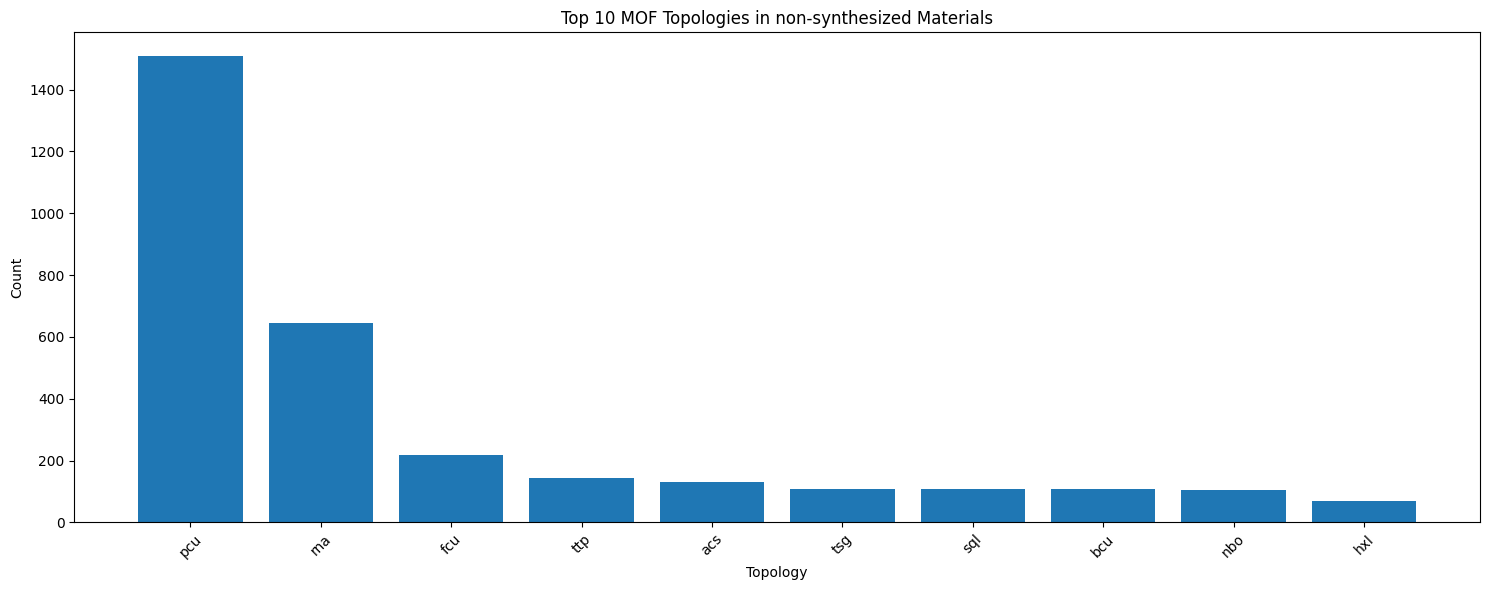

In [34]:
topology_counts = not_synthesized['info.mofid.topology'].value_counts()
top_10_topologies = topology_counts[:10]

plt.figure(figsize=(15, 6))
plt.bar(top_10_topologies.index, top_10_topologies.values)
plt.xlabel('Topology')
plt.ylabel('Count')
plt.title('Top 10 MOF Topologies in non-synthesized Materials')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

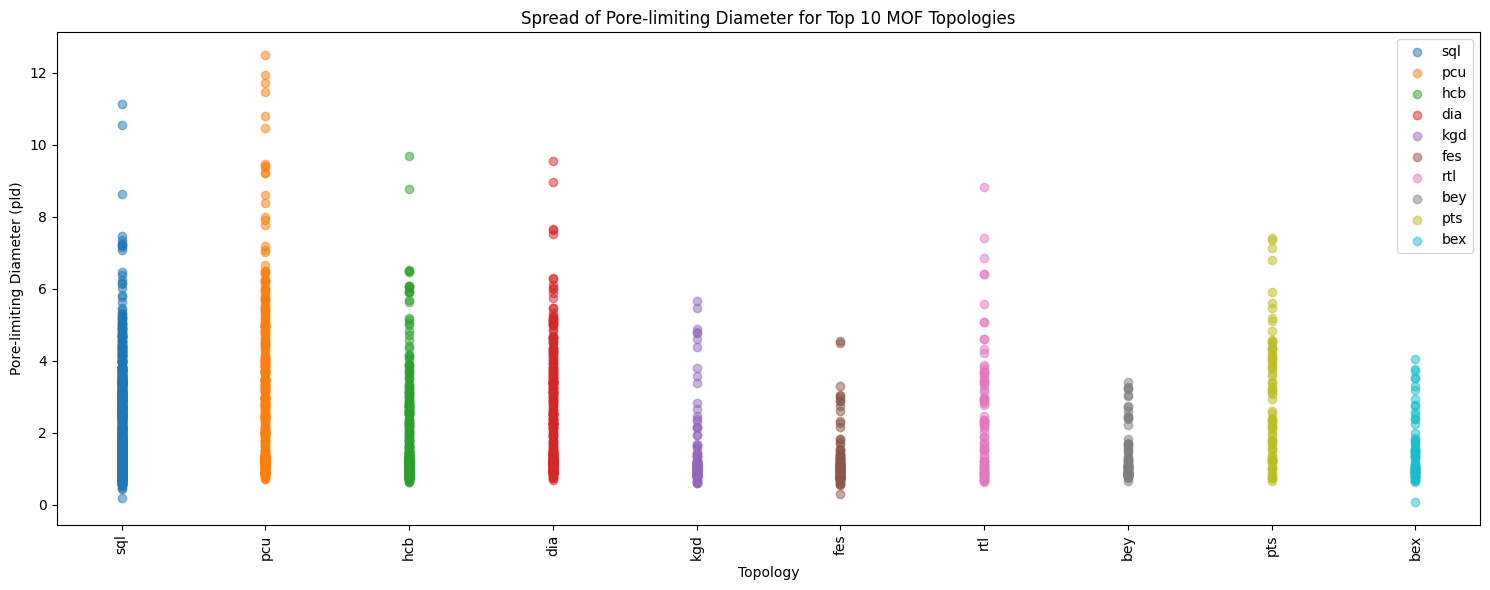

In [32]:
topology_counts = synthesized['info.mofid.topology'].value_counts()
top_10_topologies = topology_counts[:10].index.tolist()

plt.figure(figsize=(15, 6))
for topology in top_10_topologies:
  data = synthesized[synthesized['info.mofid.topology'] == topology]['info.pld']
  plt.scatter([topology] * len(data), data, label=topology, alpha=0.5)

plt.xlabel('Topology')
plt.ylabel('Pore-limiting Diameter (pld)')
plt.title('Spread of Pore-limiting Diameter for Top 10 MOF Topologies')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


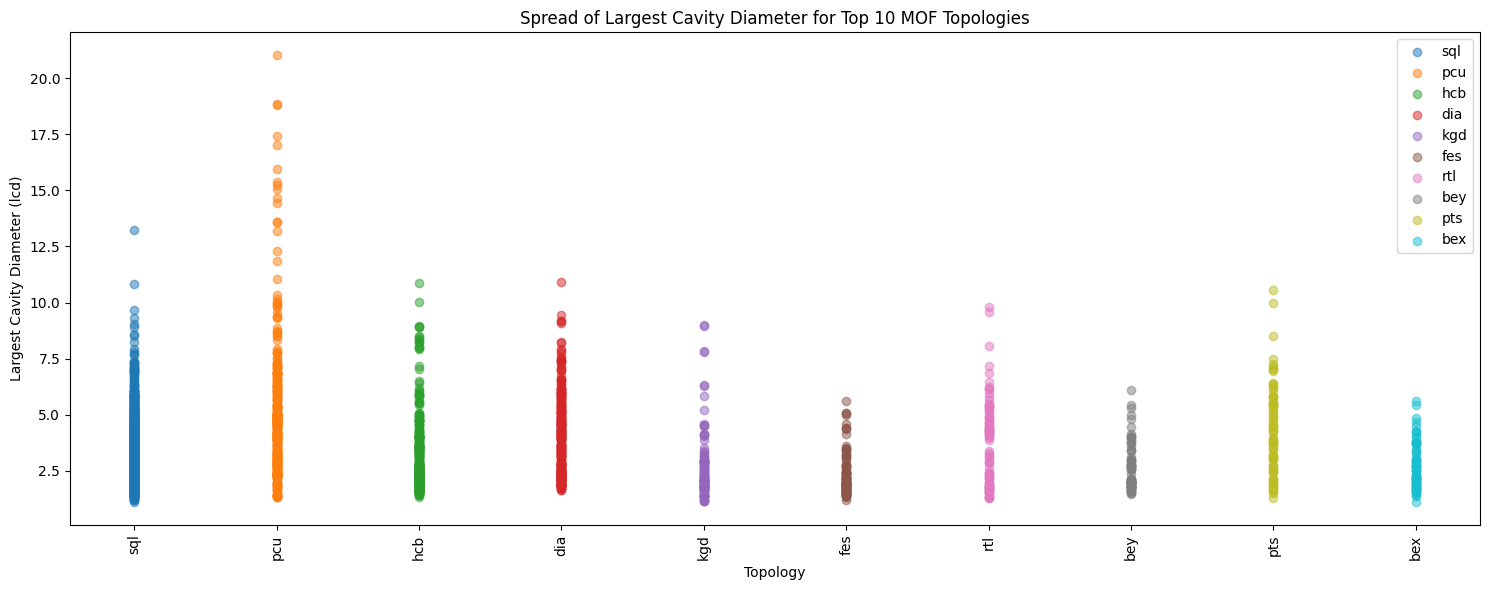

In [33]:
plt.figure(figsize=(15, 6))
for topology in top_10_topologies:
  data = synthesized[synthesized['info.mofid.topology'] == topology]['info.lcd']
  plt.scatter([topology] * len(data), data, label=topology, alpha=0.5)

plt.xlabel('Topology')
plt.ylabel('Largest Cavity Diameter (lcd)')
plt.title('Spread of Largest Cavity Diameter for Top 10 MOF Topologies')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


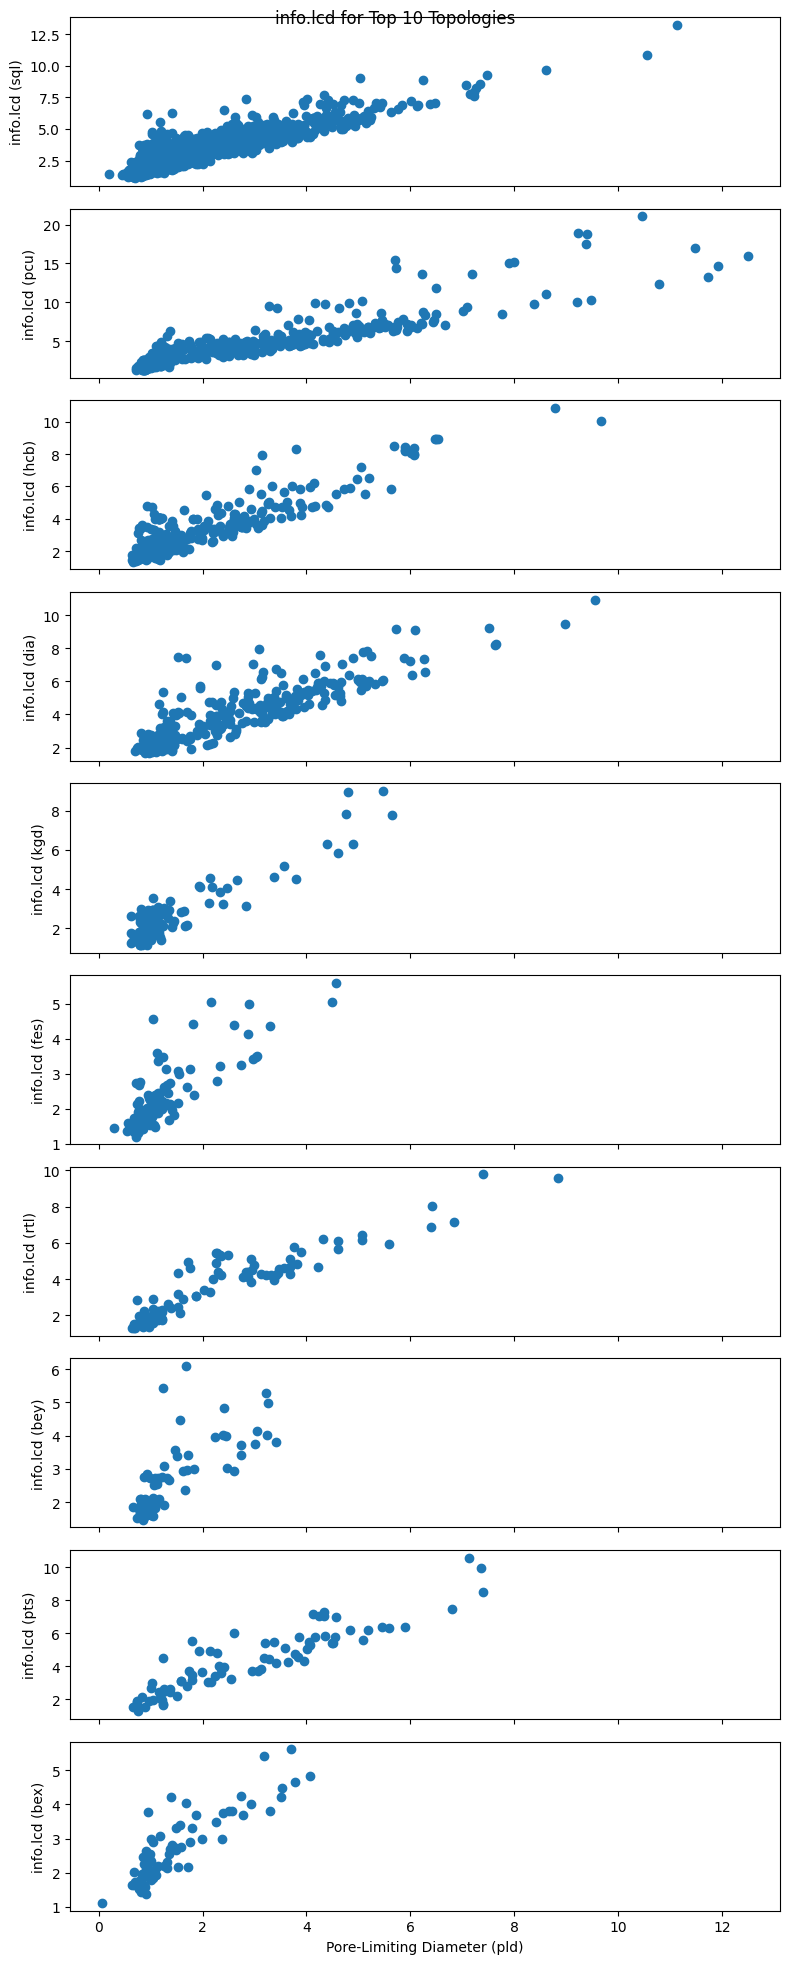

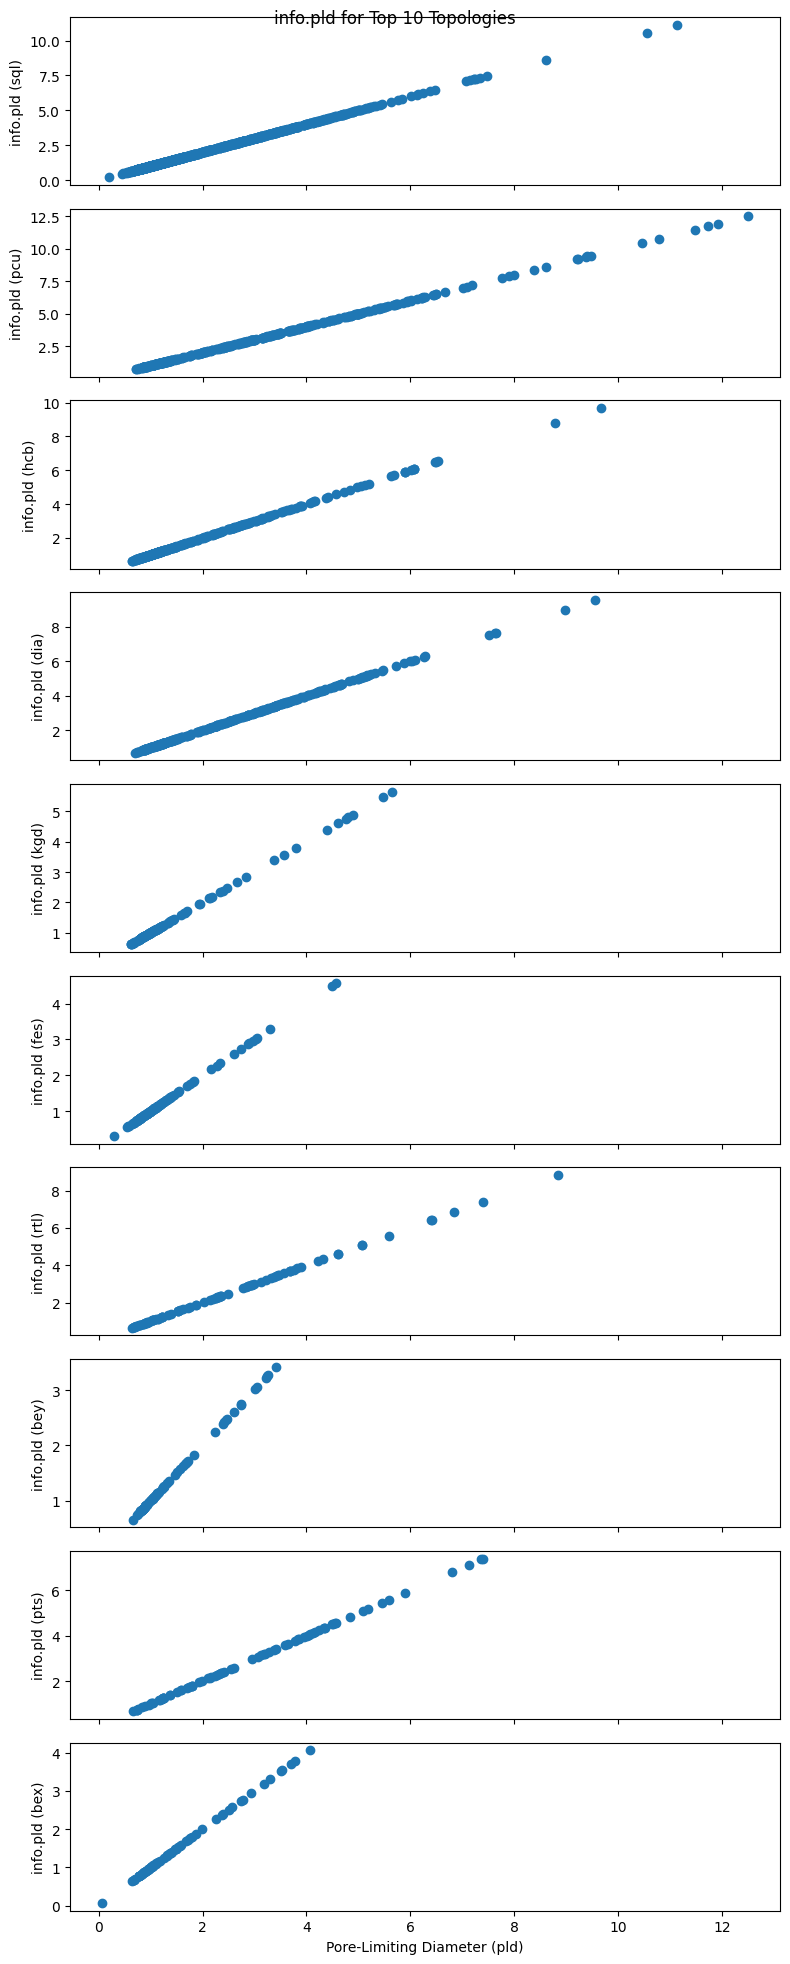

In [30]:
def plot_topology_properties(df, topology_list, property_name):
  """Plots pld or lcd for a given list of topologies"""
  fig, axs = plt.subplots(len(topology_list), 1, figsize=(8, 2 * len(topology_list)), sharex=True)
  for i, topology in enumerate(topology_list):
    data = df[df['info.mofid.topology'] == topology]
    axs[i].scatter(data['info.pld'], data[property_name])
    axs[i].set_ylabel(f"{property_name} ({topology})")
  plt.xlabel("Pore-Limiting Diameter (pld)")
  fig.suptitle(f"{property_name} for Top 10 Topologies")
  plt.tight_layout()
  plt.show()

top_10_synthesized_topologies = synthesized['info.mofid.topology'].value_counts()[:10].index.tolist()
#top_10_not_synthesized_topologies = not_synthesized['info.mofid.topology'].value_counts()[:10].index.tolist()

plot_topology_properties(synthesized, top_10_synthesized_topologies, "info.lcd")
plot_topology_properties(synthesized, top_10_synthesized_topologies, "info.pld")

#plot_topology_properties(not_synthesized, top_10_not_synthesized_topologies, "info.lcd")
#plot_topology_properties(not_synthesized, top_10_not_synthesized_topologies, "info.pld")

